## *Elements of Machine Learning* 2023
## Alan Reyes-Figueroa

# Generación de datos aleatorios

In [1]:
import numpy as np             # cálculo numérico
import scipy.stats as st       # estadística

import matplotlib.pyplot as plt  # graficación
import seaborn as sns            # graficación

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Ejemplo Bernoulli

In [3]:
np.random.seed(14927)

In [4]:
# Generar una muestra de una variable Bernoulli Ber(0.5)
# de tamaño N = 1000

N = 1000
p = 0.5
sample = np.random.choice(2, p=[1-p,p], size=N)

In [5]:
sample.shape

(1000,)

In [6]:
sample[:36]

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

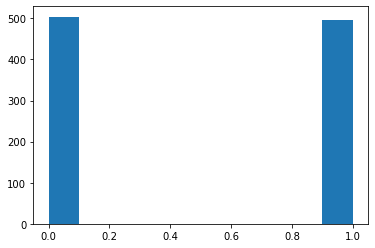

In [7]:
plt.figure()
plt.hist(sample)
plt.show()

In [8]:
(sample==0).sum() / N

0.504

In [9]:
(sample==1).sum() / N

0.496

In [10]:
# Otra forma

N = 1000
p = 0.5
sample2 = st.bernoulli.rvs(p, size=N)

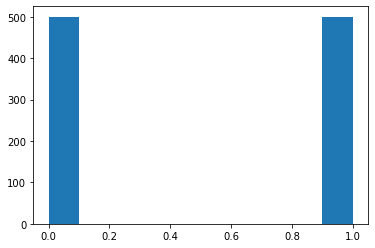

In [11]:
plt.figure()
plt.hist(sample2)
plt.show()

In [12]:
print((sample2==0).sum())
print((sample2==1).sum())

500
500


## Ejemplo Uniforme

In [13]:
# Generar una muestra de una variable Uniforme U[a,b]
# de tamaño N = 5000

N = 5000
a = 8
b = 18
sample = a + np.random.choice(b-a, size=N)

In [14]:
sample.shape

(5000,)

In [15]:
print(sample.min())
print(sample.max())

8
17


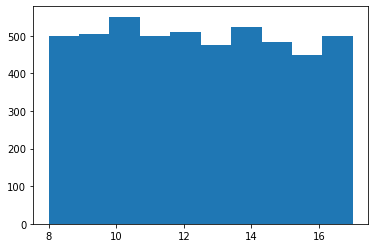

In [16]:
bns = sample.max() - sample.min() + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [17]:
bins = np.arange(sample.min(), sample.max()+2)
bins

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [18]:
x, y = np.histogram(sample, bins=bins)

In [19]:
print(x.shape, y.shape)

(10,) (11,)


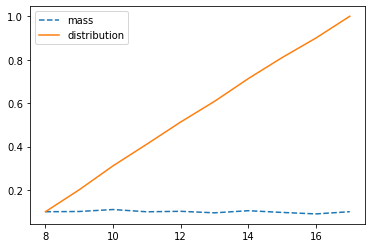

In [20]:
plt.figure()
plt.plot(y[:-1], x/N, '--', label='mass')
plt.plot(y[:-1], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [21]:
# imprimiendo el valor exacto de la probabilidad para cada x
for i in range(sample.min(), sample.max()+1):
    print(i, (sample==i).sum() / N)

8 0.1
9 0.1012
10 0.1102
11 0.0998
12 0.102
13 0.095
14 0.1048
15 0.0968
16 0.09
17 0.1002


## Ejemplo Binomial

In [22]:
# Generar una muestra de una variable Binomial Bin(k, p)
# de tamaño N = 10000

N = 10000
k = 25
p = 0.5
sample = np.random.binomial(k, p=p, size=N)

In [23]:
sample.shape

(10000,)

In [24]:
sample[:44]

array([11, 14, 11, 15, 11, 14, 10, 11,  6, 12, 10, 10,  8, 17, 17, 13, 10,
       13, 10, 12, 16, 15, 11, 10, 11,  9, 10, 10, 15,  8, 12, 12, 11, 15,
       10, 12, 12, 13, 11,  9, 12, 12, 11, 11])

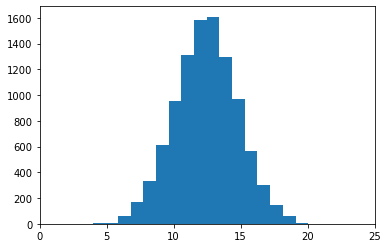

In [25]:
bns = sample.max() - sample.min() + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.xlim([0,k])
plt.show()

In [26]:
bins = np.arange(sample.min(), sample.max()+1)
x, y = np.histogram(sample, bins=bns)

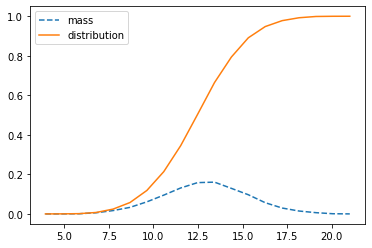

In [27]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [28]:
# imprimiendo el valor de probabilidad para cada x
for i in range(0, k+1):
    print(i, (sample==i).sum() / N)

0 0.0
1 0.0
2 0.0
3 0.0001
4 0.0003
5 0.001
6 0.006
7 0.017
8 0.0332
9 0.0612
10 0.0952
11 0.1314
12 0.1584
13 0.1608
14 0.1293
15 0.0971
16 0.0568
17 0.0299
18 0.0147
19 0.0064
20 0.001
21 0.0002
22 0.0
23 0.0
24 0.0
25 0.0


In [29]:
sample.mean()    #media teórica

12.4607

In [30]:
k*p              #media empírica

12.5

In [31]:
error = np.abs(sample.mean() - k*p) / (k*p)
print(error)
print('error = {}%'.format(error * 100))

0.003144000000000062
error = 0.31440000000000623%


## Ejemplo Geométrica

In [32]:
# Generar una muestra de una variable Binomial Bin(k, p)
# de tamaño N = 10000

N = 10000
p = 0.25
sample = np.random.geometric(p=p, size=N)

In [33]:
sample.shape

(10000,)

In [34]:
sample[:44]

array([ 4,  5,  6,  3,  1,  3,  9,  2,  3,  7,  5,  3,  6,  3,  2,  2,  5,
        1,  1,  3,  2,  9,  6,  6, 10,  2,  4,  2,  2,  2,  1,  4,  7,  4,
        8,  1, 12,  1,  1,  8,  9,  2,  1,  1])

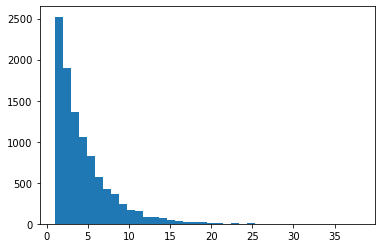

In [35]:
bns = sample.max() - sample.min() + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [36]:
bins = np.arange(sample.min(), sample.max()+1)
x, y = np.histogram(sample, bins=bns)

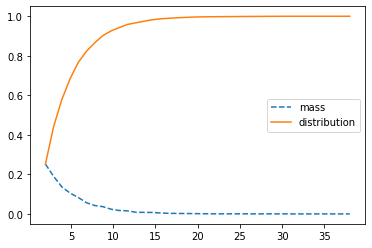

In [37]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [38]:
# imprimiendo los valores de probabilidad
for i in range(1, sample.max()+1):
    print(i, (sample==i).sum() / N)

1 0.2523
2 0.1899
3 0.1367
4 0.1052
5 0.0829
6 0.0565
7 0.0424
8 0.0365
9 0.0237
10 0.0172
11 0.0154
12 0.0083
13 0.0079
14 0.0073
15 0.0047
16 0.0029
17 0.0024
18 0.002
19 0.0016
20 0.0011
21 0.0005
22 0.0003
23 0.0004
24 0.0003
25 0.0004
26 0.0002
27 0.0002
28 0.0003
29 0.0001
30 0.0003
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0001


In [39]:
sample.mean()   #media teórica

3.9888

In [40]:
1/p             #media empírica

4.0

In [41]:
error = np.abs(sample.mean() - 1/p) * p
print(error)
print('error = {}%'.format(error * 100))

0.0028000000000000247
error = 0.28000000000000247%


## Ejemplo Gamma

In [42]:
# Generar una muestra de una variable gaussiana N(mu, sigma)
# de tamaño N = 10000

N = 10000
a = 2      # parámetro de forma
b = 5      # parámetro de localización
sample = np.random.gamma(a, b, size=N)

In [43]:
sample.shape

(10000,)

In [44]:
sample[:44]

array([ 1.42904611,  8.25360394, 21.36293699, 37.04365452,  1.36520908,
       13.91507559, 14.28237484, 16.04449572,  6.52042235,  4.6829817 ,
        8.24996128,  0.41329038,  3.55754998, 10.92835587,  9.01381253,
        1.57234019,  9.9982363 , 12.1802372 ,  6.62084455,  4.41902449,
        5.56923746,  4.46651009,  4.51932701,  3.07116881, 11.04450757,
        5.39860153, 14.42128223,  7.48661458, 32.64352643,  4.88910483,
        9.22852331,  6.90970097,  7.87293776,  5.93281123, 24.58218386,
        9.34694386,  3.01530161, 15.96826829,  6.89316694, 19.87934853,
        6.3039478 , 15.80858369,  5.43252562, 12.00755937])

33


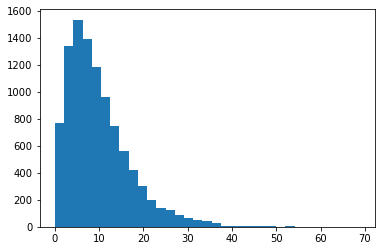

In [45]:
bns = int(3.3*(1 + np.log(N)))
print(bns)
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [46]:
x, y = np.histogram(sample, bins=bns)

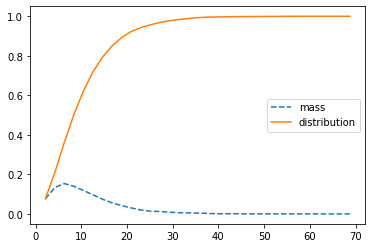

In [47]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

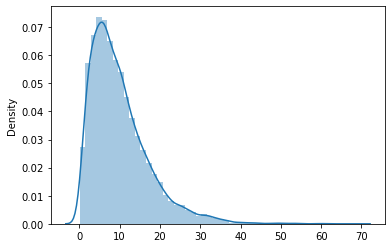

In [48]:
# densidad aproximada
plt.figure()
sns.distplot(sample, kde=True)
plt.show()